In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def draw_points_with_labels(coordinates, labels, model):
    x_values = [coord[0] for coord in coordinates]
    y_values = [coord[1] for coord in coordinates]

    plt.figure(figsize=(16,9))
    plt.scatter(x_values, y_values, color='blue')

    for i, label in enumerate(labels):
        plt.annotate(label, (x_values[i], y_values[i]), textcoords="offset points", xytext=(5,5), ha='center')

    plt.title(model, fontweight='bold')

    plt.gca().spines['right'].set_visible(False)  # Hide the right spine
    plt.gca().spines['top'].set_visible(False)    # Hide the top spine
    plt.gca().spines['left'].set_visible(False)   # Hide the left spine
    plt.gca().tick_params(left=False)             # Hide the y-axis tick marks
    plt.gca().set_yticklabels([])                 # Hide the y-axis tick labels
    plt.gca().tick_params(bottom=False)           # Hide the x-axis tick marks
    plt.gca().set_xticklabels([])                 # Hide the y-axis tick labels
    
    plt.tight_layout()
    plt.savefig('fig_%s_%s.pdf' % (model, mode))

In [3]:
# load data
data = pd.read_excel('./age_use_data.xlsx')
data.head()
mode = 'age'

In [4]:
# randomly select rows
data['y_axis'] = np.random.rand(len(data)) - 0.5

coordinates_clip = data[['%s_score_clip' % mode, 'y_axis']].values
coordinates_vit = data[['%s_score_vit' % mode, 'y_axis']].values
labels = data['label'].values

In [5]:
flag = (data['%s_score_clip' % mode].values < -1) | (data['%s_score_clip' % mode].values > -0.1)
for i in range(len(flag)):
    if np.random.rand() > 0.95:
        flag[i] = True
    if not labels[i][0].isdigit():
        flag[i] = True
    if '_avg' in labels[i]:
        flag[i] = False
flag[7] = True
flag[0] = False

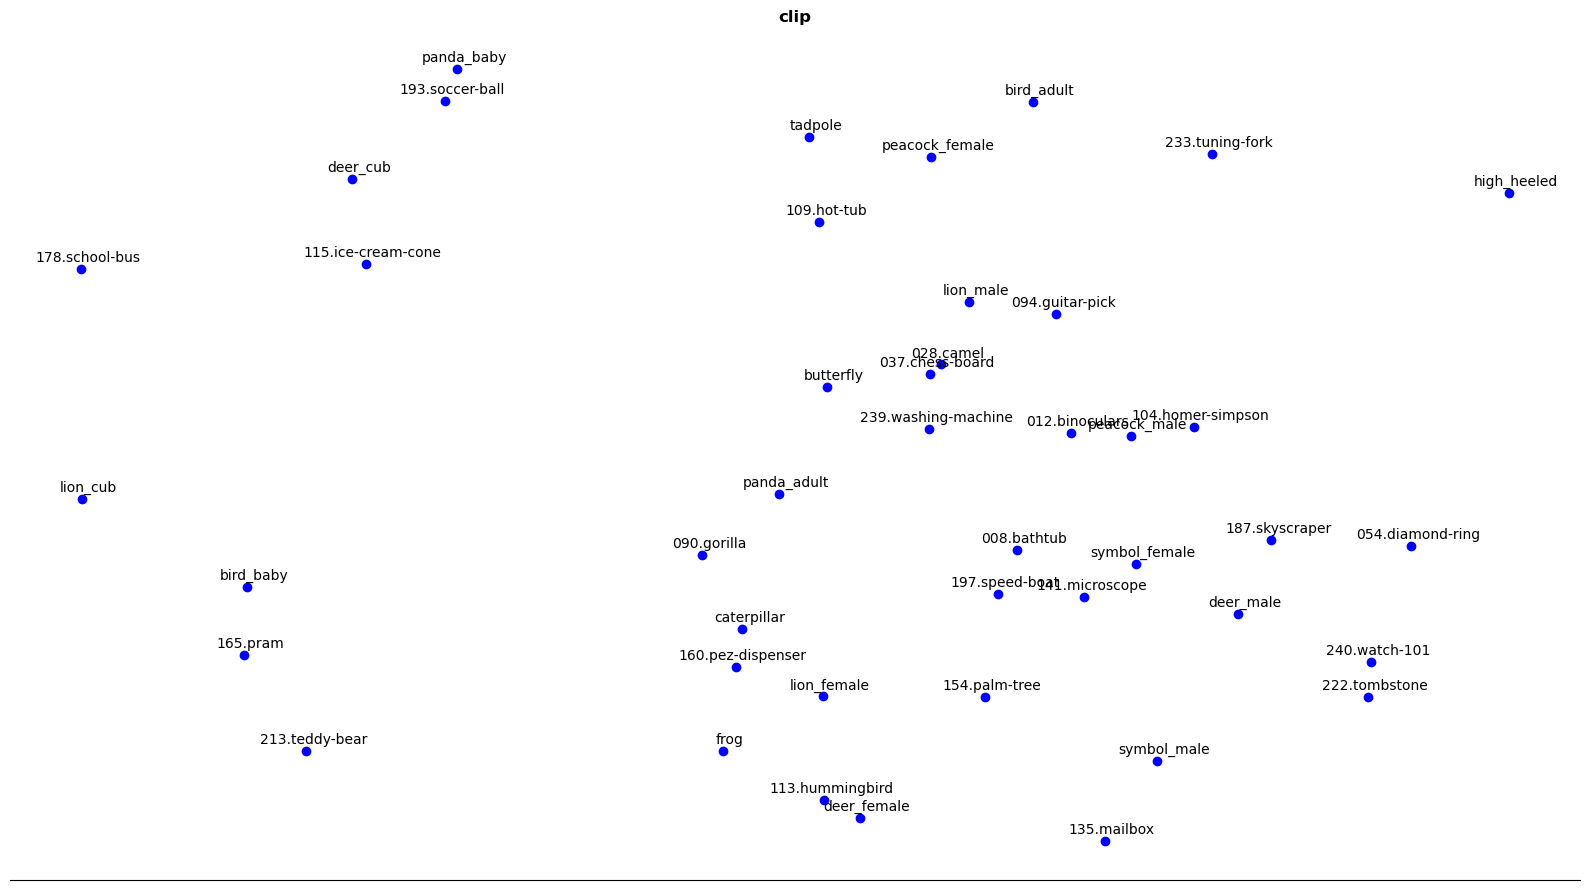

In [6]:
draw_points_with_labels(coordinates_clip[flag], labels[flag], 'clip')

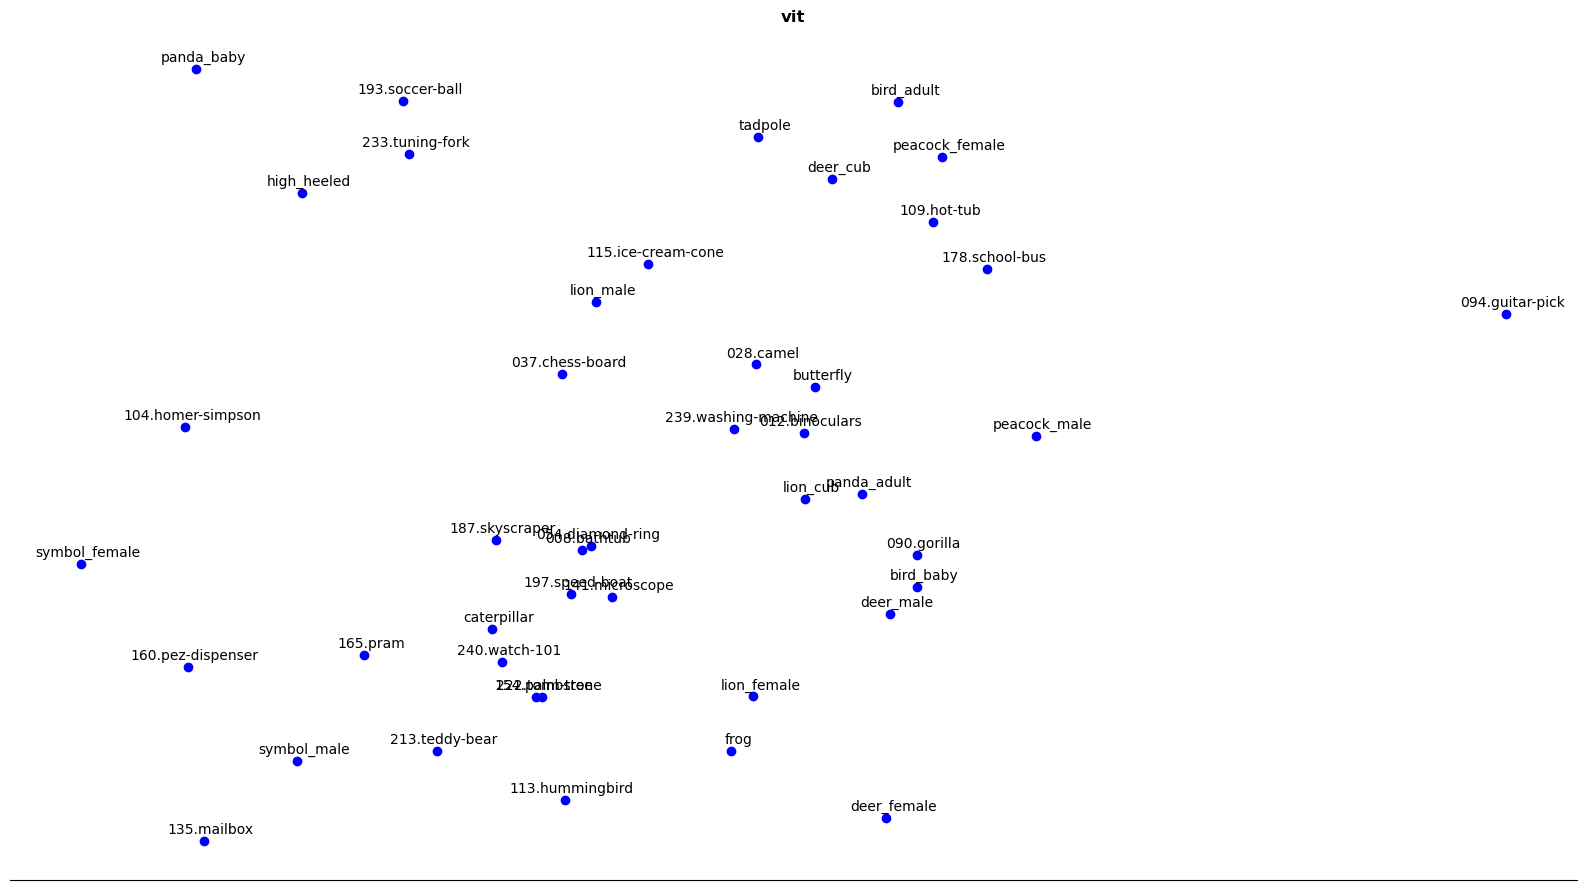

In [7]:
draw_points_with_labels(coordinates_vit[flag], labels[flag], 'vit')